# Linear regression

Linear regression is a statistical tool for modeling the relationship between a dependent variable and one or more independent variables.

The domain set $X$ is a subset of $\mathbb{R}^d$, for some $d$, and the label set $Y$ is the set of real numbers. We want to find a function $h: X \to Y$ that approximates the relationship between the input and the output.

The hypothesis function $h$ is defined as:
$$
H = L_d = {x -> < w, x> + b, w: \mathbb{R}^d, b: \mathbb{R}}
$$

The loss function is defined as:
$$
l(h, (x, y)) = (h(x) - y)^2
$$

For this loss function, the empirical risk function (average loss over the data points) is called Mean Squared Error:
$$
E_{in} (h) = \frac{1}{N} \sum_{i=1}^{N} (h(x_i) - y_i)^2
$$

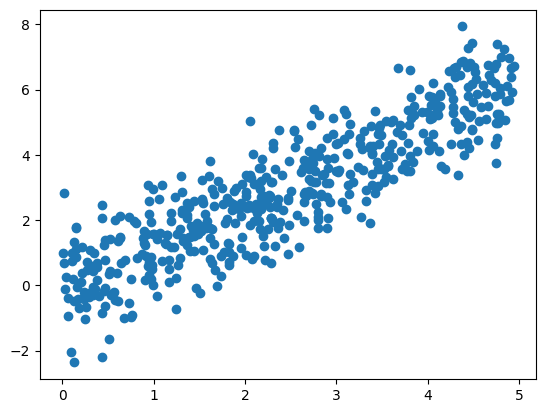

In [28]:
import numpy as np
import matplotlib.pyplot as plt

seed = 69
n_samples = 512
spreading_coeff = 5
np.random.seed(seed)


x0 = np.ones(n_samples)
x1 = spreading_coeff * np.random.rand(n_samples)
X = np.stack((x0, x1), axis=1)

y = 1.2* x1 + np.random.randn(n_samples)
plt.plot(x1, y, "o")

### Least Squares

Least squares is the algorithm that solves the ERM (Empirical Risk Minimization) problem for linear regression. The goal is to find the parameters $w$ and $b$ that minimize the empirical risk function.

$$
\argmin_w L_s(h_w) = \argmin_w \frac{1}{N} \sum_{i=1}^{N} (h_w(x_i) - y_i)^2
$$

To solve the problem we solve the following equation:
$$
\nabla E_{in}(h) = \frac{2}{N} x^T (x_w - y)= 0
$$
$$
\implies w = (xx^T)^{-1} x^T y
$$

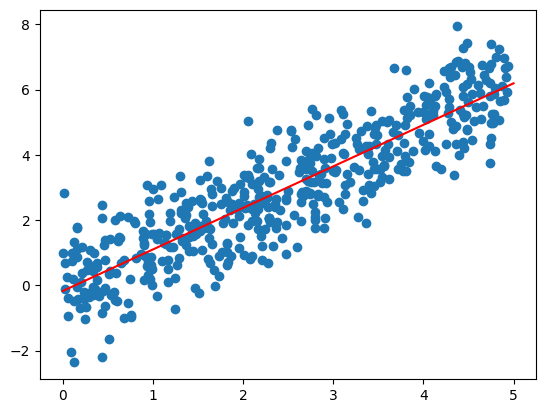

In [29]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
plt.plot(x1, y, "o")

plt.plot([0, spreading_coeff], [w[0], w[0] + spreading_coeff * w[1]], "r")

# Linear Regression with non-linear data

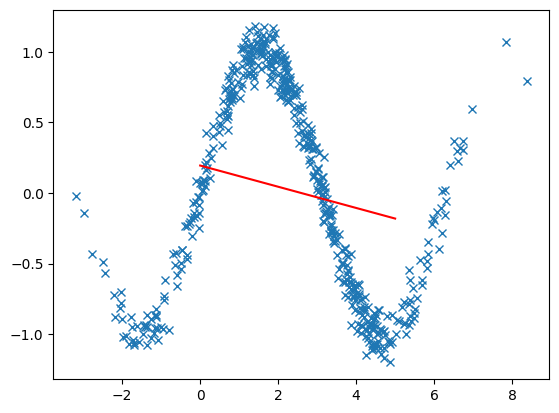

In [36]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 512
seed = 69
np.random.seed(seed)

x0 = np.ones((n_samples, 1))
x1 = np.random.normal(loc=2.5, scale=2.0, size=n_samples)

x1 = x1[:, np.newaxis]
X = np.hstack((x0, x1))

norm_noise = np.random.normal(loc=0, scale=0.1, size=n_samples).reshape(-1, 1)

y = np.sin(x1) + norm_noise

w = np.linalg.inv(X.T @ X) @ X.T @ y

plt.plot(x1, y, "x")

plt.plot([0, 5], [w[0], w[0] + 5 * w[1]], "r")